In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784",cache=False)


In [2]:
X = mnist.data.astype("float32").to_numpy()
y = mnist.target.astype("int64").to_numpy()

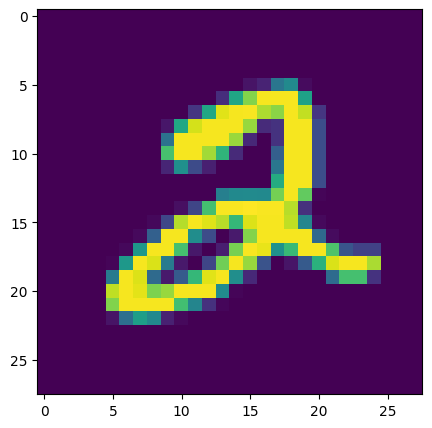

label : 2


In [3]:
plt.figure(figsize=(5,5))
idx = 5

grid_data = X[idx].reshape(28,28)
plt.imshow(grid_data, interpolation = "none")
plt.show()

print("label : {}".format(y[idx]))

<Figure size 640x480 with 0 Axes>

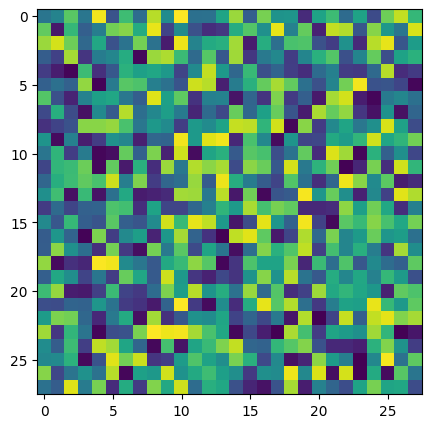

In [4]:
plt.clf()
plt.figure(figsize=(5,5))

rand_img = np.random.rand(28,28)
plt.imshow(rand_img)

plt.show()

In [5]:
labels = y[:15000]
data = X[:15000]

print("the shape of sample data =",data.shape)

the shape of sample data = (15000, 784)


In [6]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [7]:
sample_data = standardized_data

In [8]:
from sklearn import decomposition
pca = decomposition.PCA()

In [9]:
# configuring the parameters
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


In [10]:
#attaching the label for each 2-d data point
pca_data = np.vstack((pca_data.T,labels)).T

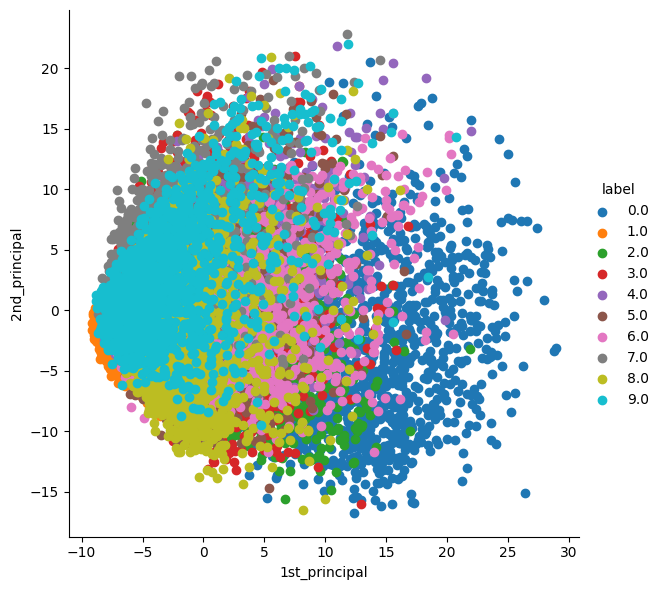

In [13]:
import seaborn as sn

# creading a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()

In [14]:
#find the co-variance matrix which is : A^T * A
# matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T, sample_data)

print("The shape of variance matrix = ",covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [15]:
sample_data.mean()

7.635882e-10

In [16]:
#find theco-variance matrix which is : A^T * A
#matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T,sample_data)

print("The shape of variance matrix = ", covar_matrix.shape)

The shape of variance matrix =  (784, 784)


In [17]:
sample_data.mean()

7.635882e-10

In [19]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix,eigvals=(782,783))
print("Shape of eigen vectors = ",vectors.shape)
vectors = vectors.T
print("Updated shape of eigen vectors = ", vectors.shape)

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [20]:
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors,sample_data.T)

print("resultanat new data points; shape ",vectors.shape,"X",sample_data.T.shape," = ",new_coordinates.shape)

resultanat new data points; shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [21]:
labels.shape

(15000,)

In [22]:
import pandas as pd
new_coordinates = np.vstack((new_coordinates, labels.reshape(1,-1))).T
dataframe = pd.DataFrame(data=new_coordinates,columns=("1st_principal","2nd_principal","label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -4.457049       0.960769    5.0
1      -7.397791      -8.658155    0.0
2       9.640694      -2.082853    4.0
3      -3.356076       7.187464    1.0
4       2.979882       4.933887    9.0


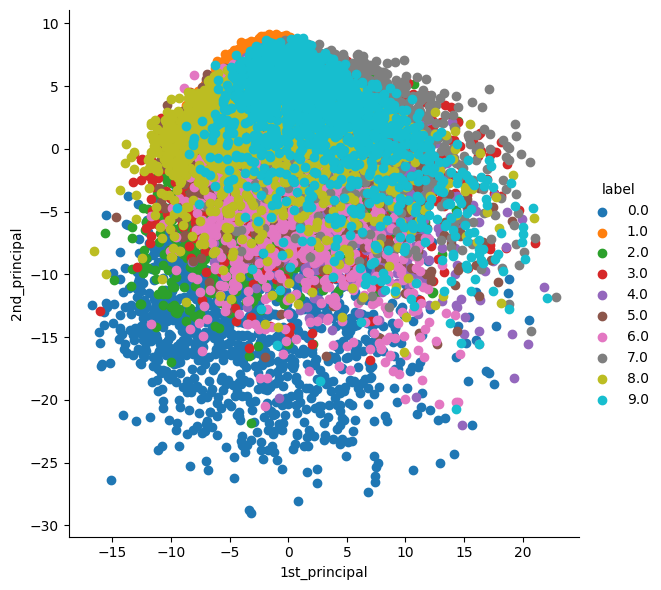

In [23]:
import seaborn as sn
sn.FacetGrid(dataframe,hue="label",height=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()